In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\yifun\Desktop\python\datasets\regression.csv')
df

,X,y
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308
5,204,532
6,49,325
7,25,332
8,173,498
9,191,498


In [46]:
X = df.iloc[:,0].values.reshape(-1,1)   #將X從一維陣列轉成二維
y = df.iloc[:,-1].values

Text(0, 0.5, 'y')

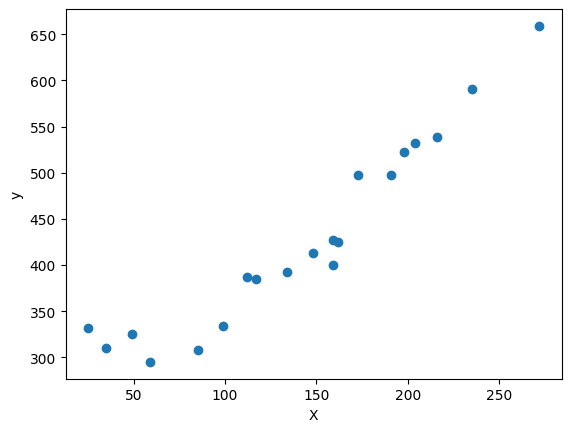

In [47]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_X = sc.fit_transform(X)
std_X

array([[ 1.39433428],
       [ 1.11069026],
       [ 0.09554325],
       [-1.59139223],
       [-0.8449606 ],
       [ 0.93154667],
       [-1.38239138],
       [-1.74067856],
       [ 0.46875906],
       [ 0.73747445],
       [-0.11345761],
       [-0.63595975],
       [-0.36724436],
       [-0.44188752],
       [ 0.3045441 ],
       [ 1.94669369],
       [ 0.25975821],
       [ 0.25975821],
       [-1.23310505],
       [ 0.84197488]])

In [15]:
df.corr()

,X,y
X,1.000000,0.950392
y,0.950392,1.000000


### 算斜率和截距

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(std_X,y,test_size=0.3,random_state=1)

lr = LinearRegression()

lr.fit(X_train,y_train)               
y_pred = lr.predict(X_test)      
print('Slope: %.3f'%lr.coef_[0])
print('Intercept: %.3f'%lr.intercept_)

Slope: 102.454
Intercept: 432.736


array([102.45374814])

### 求 RMSE(Root mean square Error 均方根誤差)、

### MAE(Mean absolute error平均絕對值誤差)

### R^2(Coefficient of determination相關係數)

In [50]:
import  sklearn.metrics as sm
mse = sm.mean_squared_error(y_test,y_pred)    
print('RMSE %.3f'%np.sqrt(mse))
print('MAE %.3f'%sm.mean_absolute_error(y_test,y_pred))
print('R^2 %.3f'%sm.r2_score(y_test,y_pred))

RMSE 39.857
MAE 38.521
R^2 0.174


### Polynomial regression 多項式回歸
A polynomial regression model is a machine learning model that can capture non-linear relationships between variables by fitting a non-linear regression line, which may not be possible with simple linear regression. It is used when linear regression models may not adequately capture the complexity of the relationship.

In [51]:
from sklearn.preprocessing import PolynomialFeatures

pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)   #增加一個二次項
X_quad = quadratic.fit_transform(X_train)

#fit linear features
pr.fit(X_quad,y_train)
y_quad_pred = pr.predict(X_quad)
print('theta0: %.3f'%pr.coef_[0])    # θ0  常數項
print('theta1: %.3f'%pr.coef_[1])    # θ1  一次項的權重
print('theta2: %.3f'%pr.coef_[2])    # θ2  二次項的權重
print('Intercept: %.3f'%pr.intercept_)   #直线与y轴的截距

theta0: 0.000
theta1: 99.267
theta2: 18.516
Intercept: 412.956


In [64]:
#三次項函數
pr2 = LinearRegression()
cubic = PolynomialFeatures(degree=3)
X_cub = cubic.fit_transform(X_train)
pr2.fit(X_cub,y_train)
print('三次函數',pr2.coef_,'  截距:',pr2.intercept_)
print('二次函數',pr.coef_,'  截距:',pr.intercept_)

三次函數 [  0.         121.36983716  22.08404137 -10.42642369]   截距: 409.1066201412883
二次函數 [ 0.         99.26661651 18.51550227]   截距: 412.95563061912054


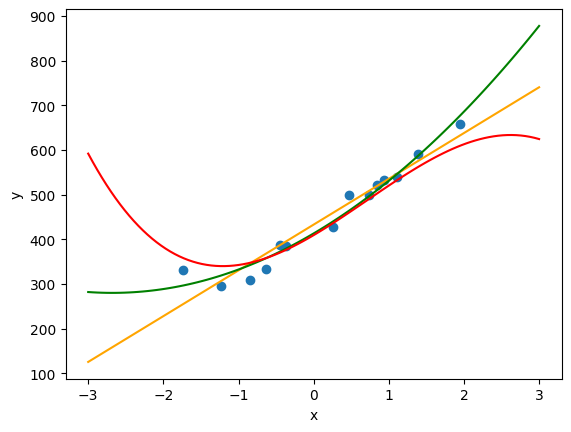

In [59]:
x = np.linspace(-3,3,100)
plt.scatter(X_train,y_train)
plt.plot(x,lr.coef_[0]*x+lr.intercept_,color='orange')     #一次函數
plt.plot(x,pr.coef_[2]*x**2+pr.coef_[1]*x+pr.intercept_,color='green')    #二次函數
plt.plot(x,pr2.coef_[3]*x**3+pr2.coef_[2]*x**2+pr.coef_[1]*x+pr2.intercept_,color='red')   #三次函數
 
plt.xlabel('x')
plt.ylabel('y')
plt.show()